In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import numpy as np

file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb'))
data = np.unpackbits(data).reshape(-1, 1600)
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 labels taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name,'rb')) # pickle reads the file and returns a 1D array with the binary labels

mask_ordered = labels == 1
mask_unordered = labels == 0


In [2]:
mag = np.sum(data, axis=1)/len(data[0,:])

In [3]:
pca = PCA(n_components=50)
PCC = pca.fit_transform(data)
print(pca.explained_variance_ratio_)  

[0.51641684 0.00413209 0.00382928 0.00379066 0.00371111 0.00308506
 0.00301656 0.00296425 0.00293335 0.00237678 0.0023244  0.00231728
 0.00228247 0.00212254 0.002114   0.00210033 0.00207556 0.00207008
 0.00206049 0.00202394 0.00202286 0.00167985 0.00167498 0.00165337
 0.0016397  0.00159424 0.00158944 0.00158077 0.00156852 0.00151851
 0.00151016 0.0015031  0.00149402 0.00148051 0.00147927 0.00147177
 0.00146689 0.00131099 0.00130303 0.00129695 0.00129274 0.00127487
 0.00126599 0.00125883 0.00125404 0.00116308 0.00115723 0.00115046
 0.00112824 0.00111186]


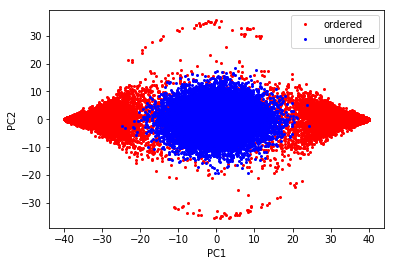

In [10]:
plt.plot(PCC[mask_ordered,0], PCC[mask_ordered,1], 'ro', markersize=2)
plt.plot(PCC[mask_unordered,0], PCC[mask_unordered,1], 'bo', markersize = 2)
plt.legend(['ordered' , 'unordered'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('PC1PC2.pdf')


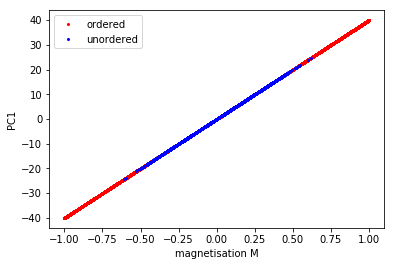

In [11]:
plt.plot(mag[mask_ordered], -PCC[mask_ordered,0], 'ro', markersize =2)
plt.plot(mag[mask_unordered], -PCC[mask_unordered,0], 'bo', markersize = 2)
plt.legend(['ordered' , 'unordered'])
plt.xlabel('magnetisation M')
plt.ylabel('PC1')
plt.savefig('PC1Mag.pdf')

[0.51641684 0.00413209 0.00382928 0.00379066 0.00371111 0.00308506
 0.00301656 0.00296425 0.00293335 0.00237678 0.0023244  0.00231728
 0.00228247 0.00212254 0.002114   0.00210033 0.00207556 0.00207008
 0.00206049 0.00202394 0.00202286 0.00167985 0.00167498 0.00165337
 0.0016397  0.00159424 0.00158944 0.00158077 0.00156852 0.00151851
 0.00151016 0.0015031  0.00149402 0.00148051 0.00147927 0.00147177
 0.00146689 0.00131099 0.00130303 0.00129695 0.00129274 0.00127487
 0.00126599 0.00125883 0.00125404 0.00116308 0.00115723 0.00115046
 0.00112824 0.00111186]


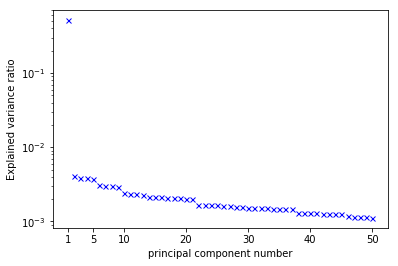

In [13]:
print(pca.explained_variance_ratio_)  

plt.semilogy(np.arange(1,51), pca.explained_variance_ratio_, 'bx', markersize = 5)
plt.xlabel('principal component number')
plt.ylabel('Explained variance ratio')
plt.xticks(np.array([1,5,10,20,30,40,50]), [1,5,10,20,30,40,50])
plt.savefig('ExplainedVar_Ising.pdf')